<a href="https://colab.research.google.com/github/StratosFair/DNN_Classifiers_Fast_Rates/blob/main/mnist_margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

In [2]:
# Load MNIST dataset
mnist_transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=mnist_transform)

# Filter for classes '1' and '7'
indices_one = [i for i, (img, label) in enumerate(mnist_train) if label == 1]
indices_seven = [i for i, (img, label) in enumerate(mnist_train) if label == 7]

# Pick 3 random samples from each class
np.random.seed(42)  # For reproducibility
chosen_ones = np.random.choice(indices_one, 3, replace=False)
chosen_sevens = np.random.choice(indices_seven, 3, replace=False)

# Create subsets of the selected images
data_one = Subset(mnist_train, chosen_ones)
data_seven = Subset(mnist_train, chosen_sevens)

# Convert the images into tensors for easy manipulation
ones = torch.stack([data_one[i][0].squeeze() for i in range(len(data_one))])
sevens = torch.stack([data_seven[i][0].squeeze() for i in range(len(data_seven))])

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 505kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.66MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.49MB/s]


In [3]:
# Interpolation function
def interpolate_images(image1, image2, alpha):
    """
    Interpolate between two images given an alpha parameter.
    """
    return (1 - alpha) * image1 + alpha * image2

In [4]:
# Interpolate between each pair (three rows, eight steps per row)
alphas = np.linspace(0, 1, 8)  # 8 interpolation steps (from 0 to 1)
interpolations = []

for i in range(3):  # For each pair of images
    row = []
    for alpha in alphas:
        interpolated_image = interpolate_images(ones[i], sevens[i], alpha)
        row.append(interpolated_image)
    interpolations.append(row)

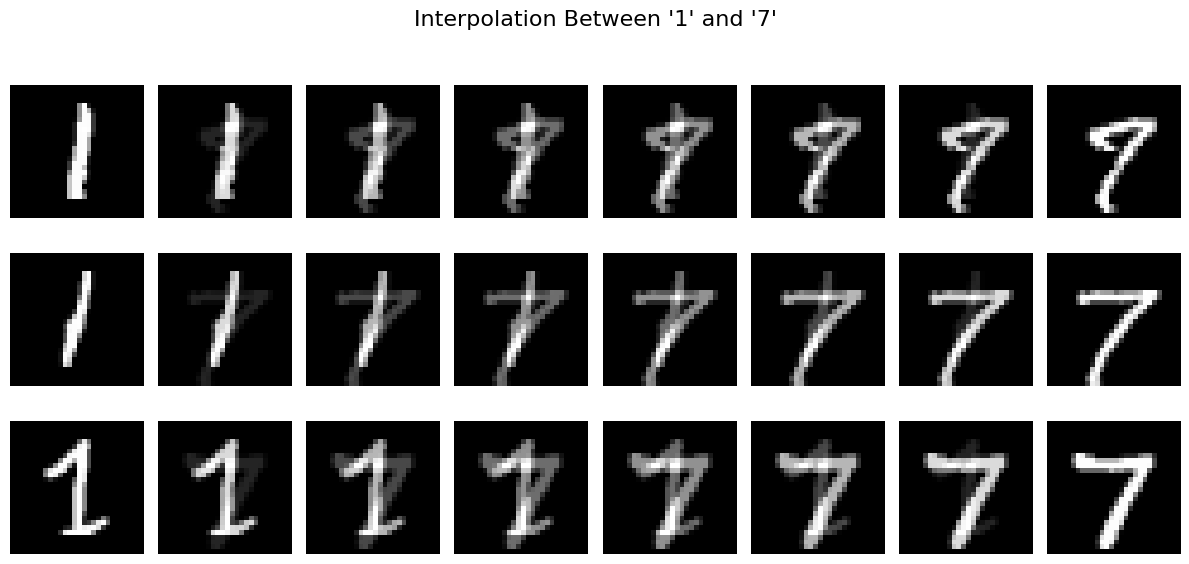

In [5]:
import matplotlib.pyplot as plt

# Plot each row of interpolations
fig, axes = plt.subplots(3, 8, figsize=(12, 6))  # 3 rows, 8 columns
fig.suptitle("Interpolation Between '1' and '7'", fontsize=16)

for row_idx, row in enumerate(interpolations):
    for col_idx, image in enumerate(row):
        axes[row_idx, col_idx].imshow(image.numpy(), cmap="gray")
        axes[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title spacing
plt.show()